# TV Sales Forecasting

About Dataset
 
 Given data contains Jan-2014 to Aug-2016 daily TV sales quantity. There are total 124 Models. This data is collected from one of the leading brand of Bangladesh. Annually there are two big festivals (EID) which follows Islamic lunar calendar.
provided data are in csv format. it contains only three columns.

* Date: Date of Sale
* Model: TV Model (not Original)
* Count: Sale Quantity

I like to throw a challenge to Kagglers to device a effective sales forecasting model.

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Time-Series/main/Forecasting/TV%20Sales%20Forecasting/Date%20and%20model%20wise%20sale.csv'

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
df=pd.read_csv(url,sep=',')
df=pd.DataFrame(data=df)
df.head()

,Date,Model,Count
0,31-Aug-16,M45,5
1,31-Aug-16,M121,3
2,31-Aug-16,M122,4
3,31-Aug-16,M91,10
4,31-Aug-16,M66,57


In [ ]:
df.dtypes

Date     object
Model    object
Count     int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [ ]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [ ]:
df['Model'].value_counts()

M119    926
M70     778
M97     770
M88     769
M43     748
       ... 
M14      13
M84      10
M42       2
M47       1
M12       1
Name: Model, Length: 124, dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Model,Count
0,2016-08-31,M45,5
1,2016-08-31,M121,3
2,2016-08-31,M122,4
3,2016-08-31,M91,10
4,2016-08-31,M66,57


In [ ]:
df.set_index('Date',inplace=True)
df.head()

,Model,Count
Date,,
2016-08-31,M45,5
2016-08-31,M121,3
2016-08-31,M122,4
2016-08-31,M91,10
2016-08-31,M66,57


In [ ]:
df=df.drop('Model',axis=1)

In [ ]:
df.head()

,Count
Date,
2016-08-31,5
2016-08-31,3
2016-08-31,4
2016-08-31,10
2016-08-31,57


In [ ]:
df_sum = df.groupby('Date')['Count'].sum().reset_index()
df_sum = df_sum.rename(columns={'Count': 'counts'})

In [ ]:
df_sum.head()

,Date,counts
0,2014-01-01,395
1,2014-01-02,4
2,2014-01-03,1
3,2014-01-04,2
4,2014-01-07,2


In [ ]:
df_sum.sample(25)

,Date,counts
137,2014-05-21,1197
241,2014-09-02,1362
485,2015-05-04,1698
836,2016-04-19,6870
317,2014-11-17,1150
608,2015-09-04,8975
325,2014-11-25,981
775,2016-02-18,7523
76,2014-03-21,340
938,2016-07-30,10742


In [ ]:
df_sum.shape

(971, 2)

In [ ]:
df_sum.columns

Index(['Date', 'counts'], dtype='object')

In [ ]:
df_sum.set_index('Date', inplace=True)
df_sum.head(10)

,counts
Date,
2014-01-01,395
2014-01-02,4
2014-01-03,1
2014-01-04,2
2014-01-07,2
2014-01-09,7
2014-01-10,5
2014-01-11,17
2014-01-12,59


In [ ]:
df_sum = df_sum['counts'].resample('MS').mean()

In [ ]:
df_sum

Date
2014-01-01      146.428571
2014-02-01      395.642857
2014-03-01      417.709677
2014-04-01      592.633333
2014-05-01     1079.096774
2014-06-01     1042.233333
2014-07-01     1577.032258
2014-08-01     1419.580645
2014-09-01     1609.766667
2014-10-01     1510.903226
2014-11-01     1184.233333
2014-12-01     1187.451613
2015-01-01     1356.903226
2015-02-01     1460.678571
2015-03-01     1508.903226
2015-04-01     1592.400000
2015-05-01     1680.032258
2015-06-01     6427.033333
2015-07-01    11685.000000
2015-08-01    10515.161290
2015-09-01    10118.566667
2015-10-01     8048.806452
2015-11-01     6084.366667
2015-12-01     5736.387097
2016-01-01     6619.000000
2016-02-01     7177.103448
2016-03-01     7148.967742
2016-04-01     6843.000000
2016-05-01     7601.000000
2016-06-01     8577.366667
2016-07-01    12807.548387
2016-08-01    10765.032258
Freq: MS, Name: counts, dtype: float64

In [ ]:
df_sum=pd.DataFrame(data=df_sum,columns=['counts'])

In [ ]:
df_sum.head()

,counts
Date,
2014-01-01,146.428571
2014-02-01,395.642857
2014-03-01,417.709677
2014-04-01,592.633333
2014-05-01,1079.096774


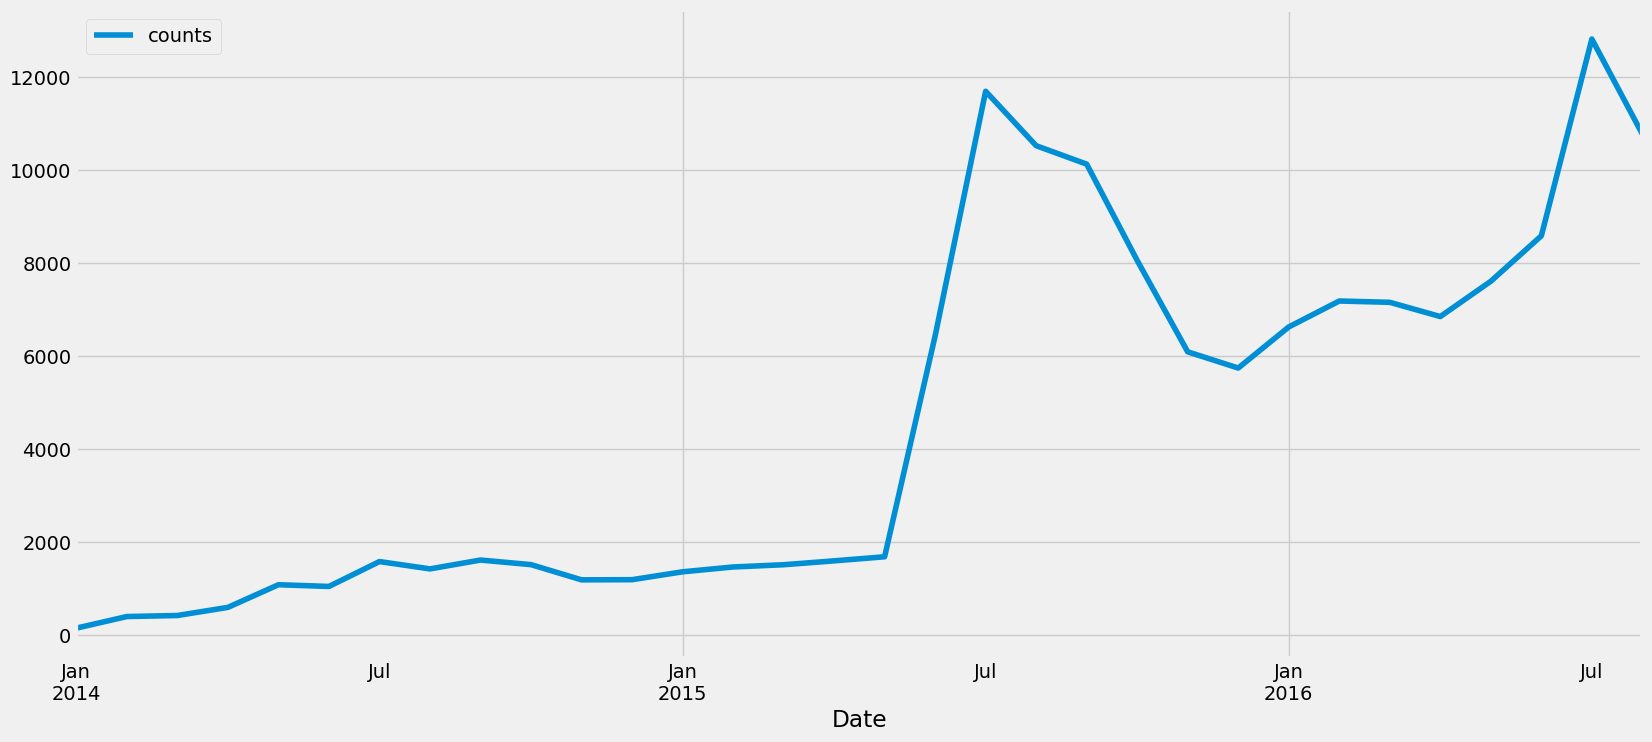

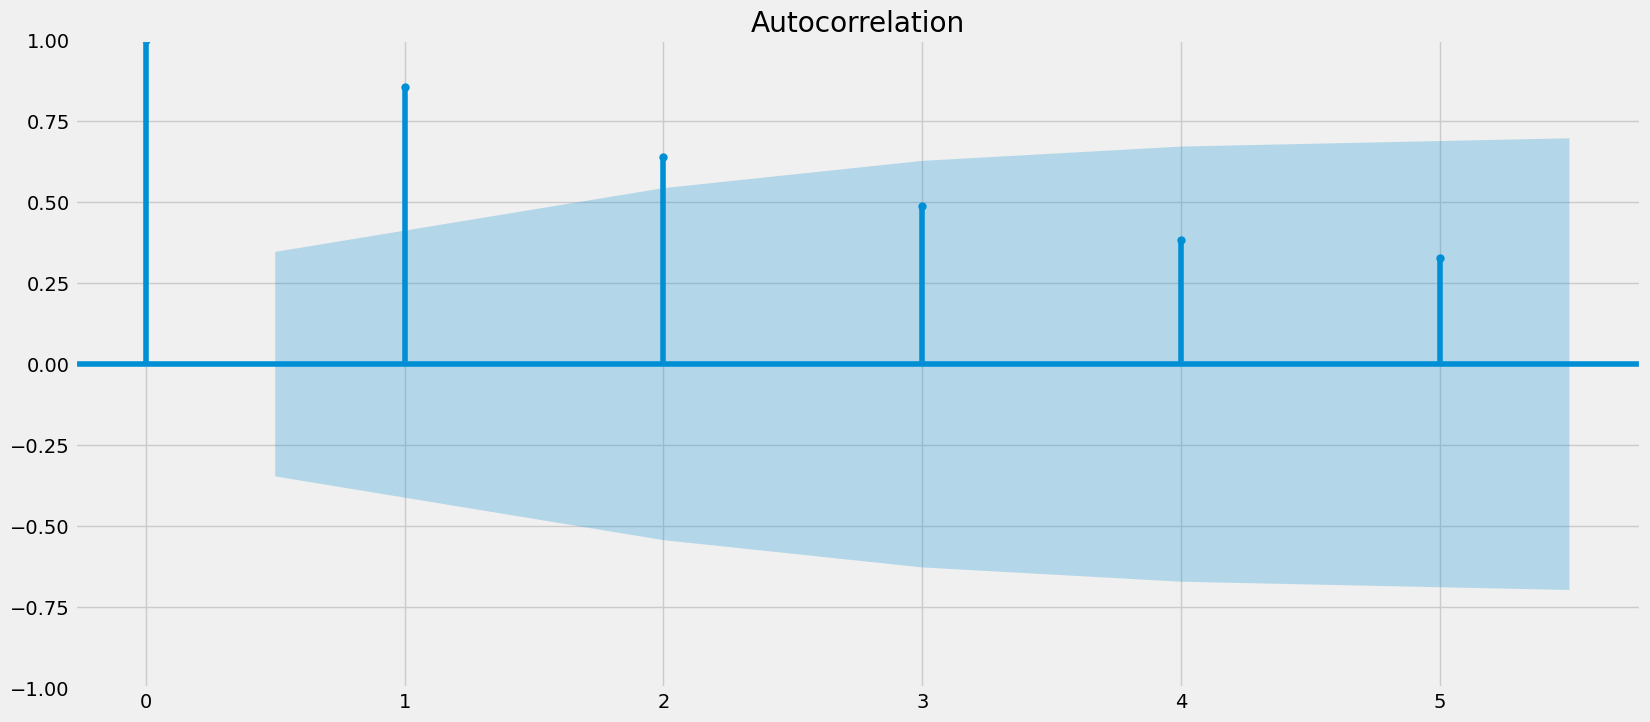

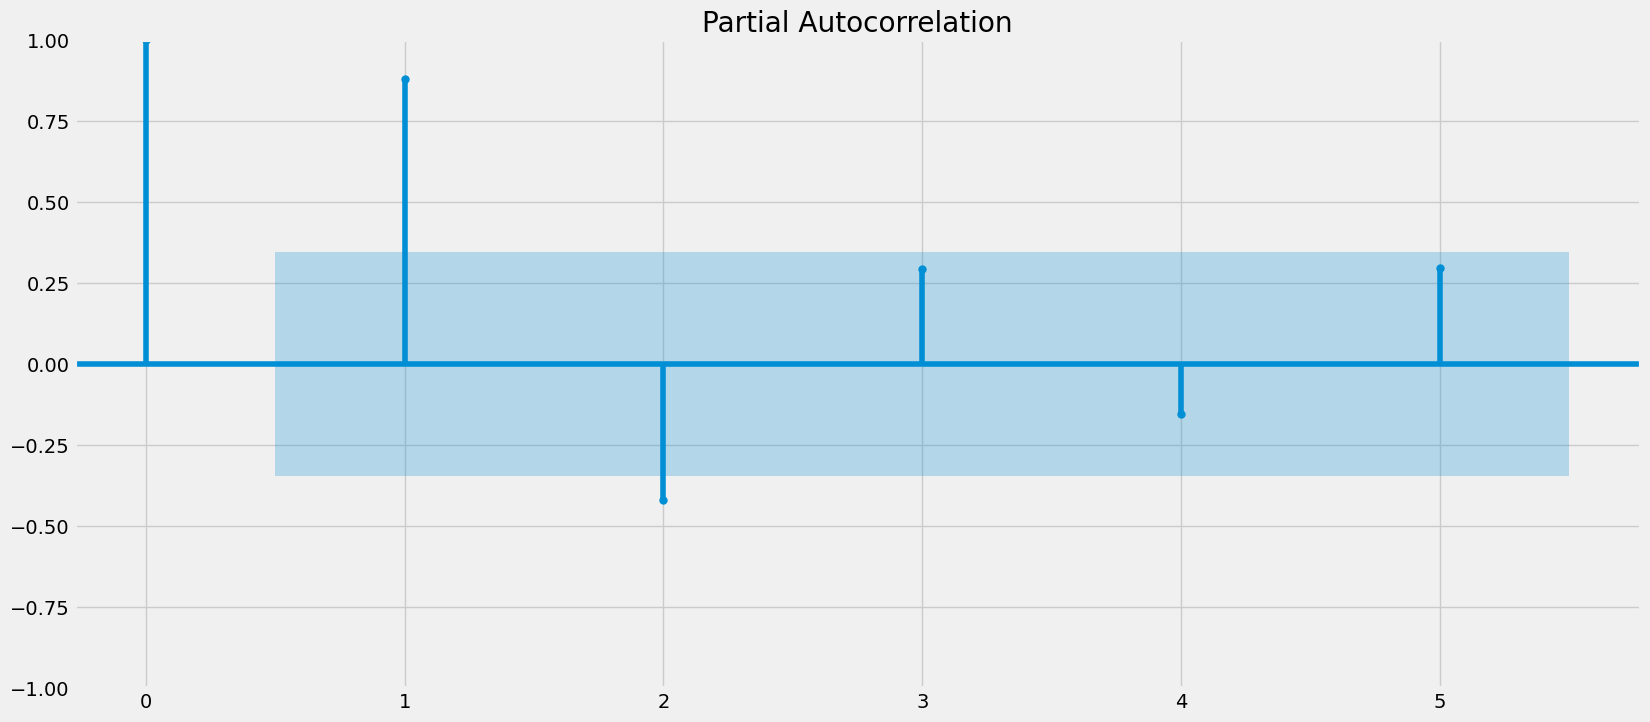

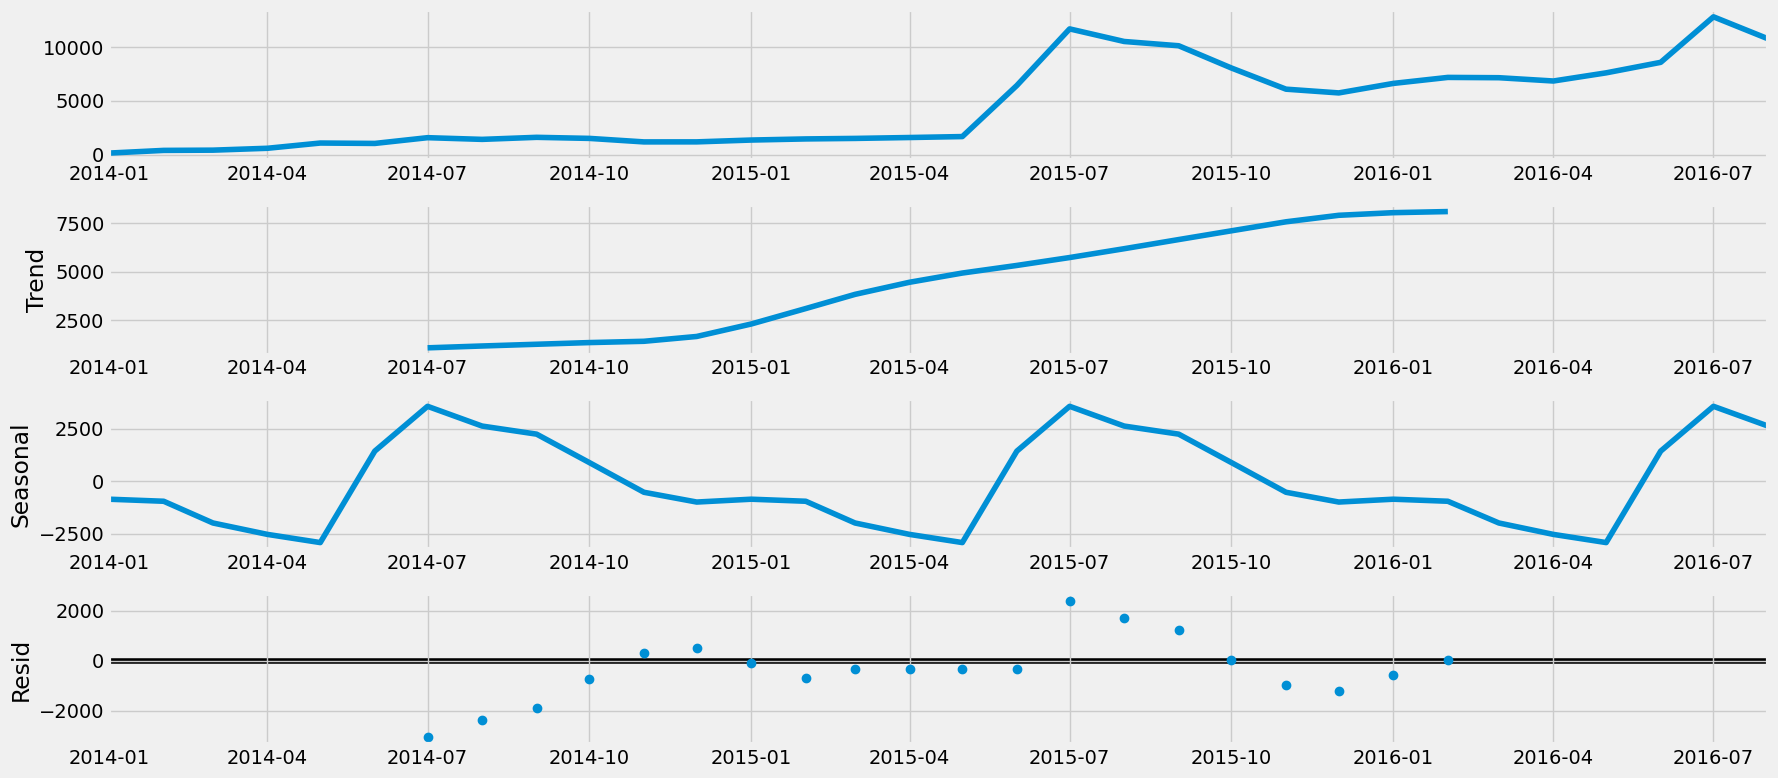

In [ ]:
df_sum.plot()
plt.show()
plot_acf(df_sum, lags=5)
matplotlib.pyplot.show()
plot_pacf(df_sum, lags=5)
matplotlib.pyplot.show()


from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_sum, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
#apply adf test on the series
print(adf_test(df_sum))
print()
print(kpss_test(df_sum))

Results of Dickey-Fuller Test:
Test Statistic                 -1.456696
p-value                         0.554814
#Lags Used                      1.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
None

Results of KPSS Test:
Test Statistic           0.75012
p-value                  0.01000
Lags Used                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64
None


<Axes: xlabel='Date'>

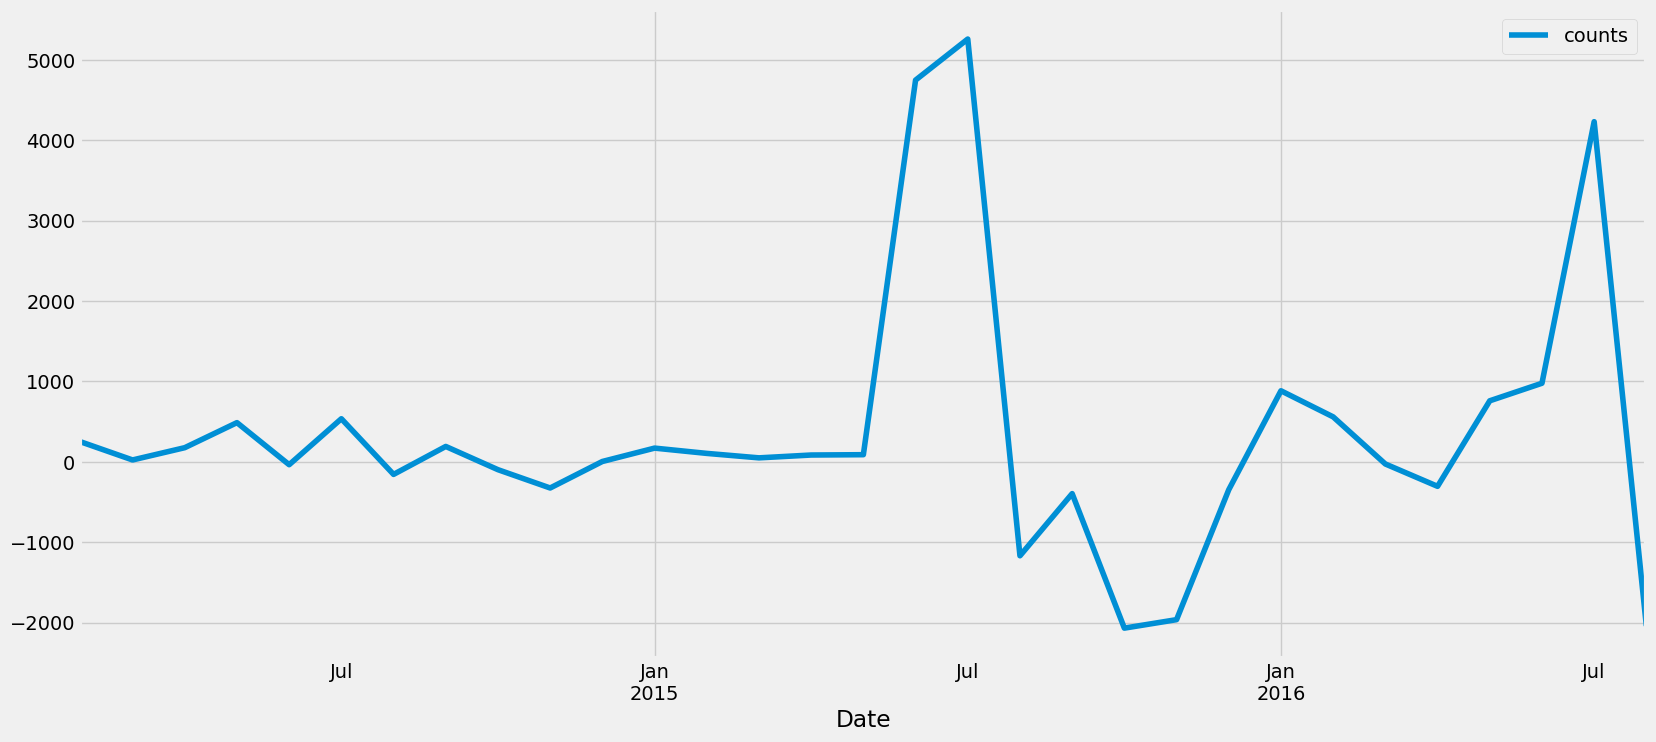

In [ ]:
df_sum_adj = df_sum - df_sum.shift(1)
df_sum_adj = df_sum_adj.dropna()
df_sum_adj.plot()

In [ ]:
#apply adf test on the series
print(adf_test(df_sum_adj))

Results of Dickey-Fuller Test:
Test Statistic                 -4.051618
p-value                         0.001163
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
None


<Axes: xlabel='Date'>

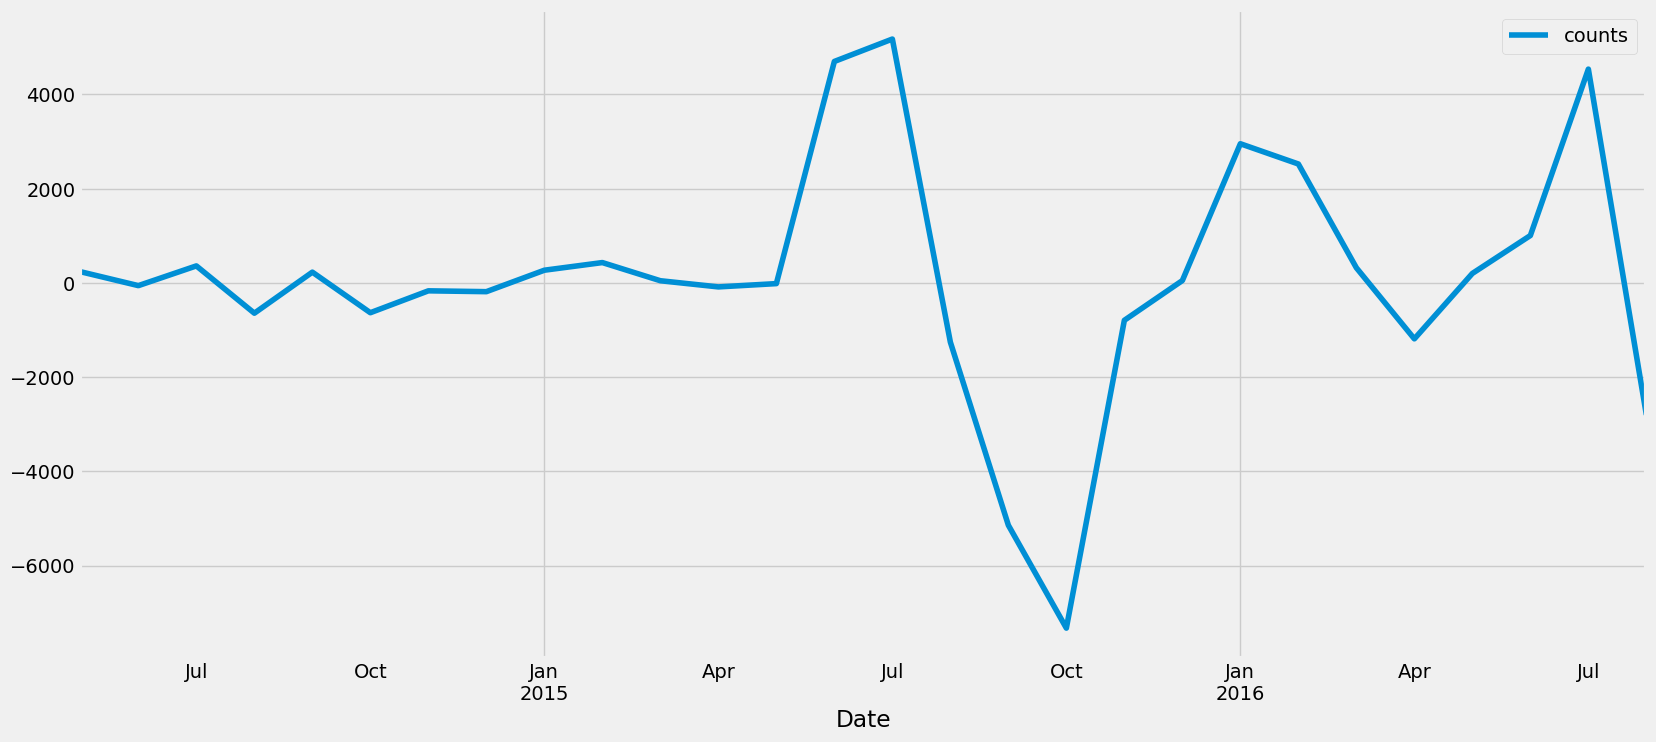

In [ ]:
df_sum_adj = df_sum_adj - df_sum_adj.shift(3)
df_sum_adj = df_sum_adj.dropna()
df_sum_adj.plot()

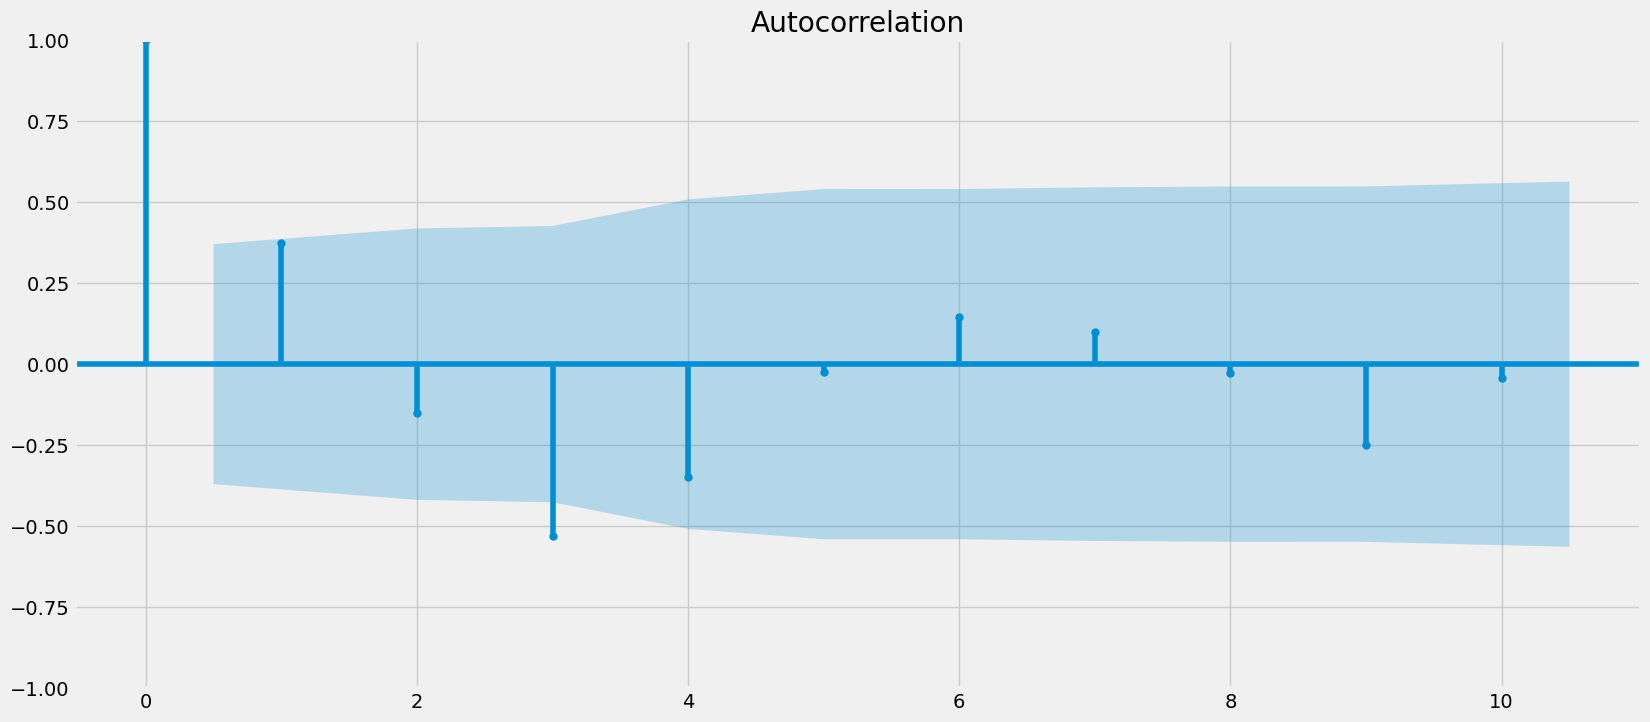

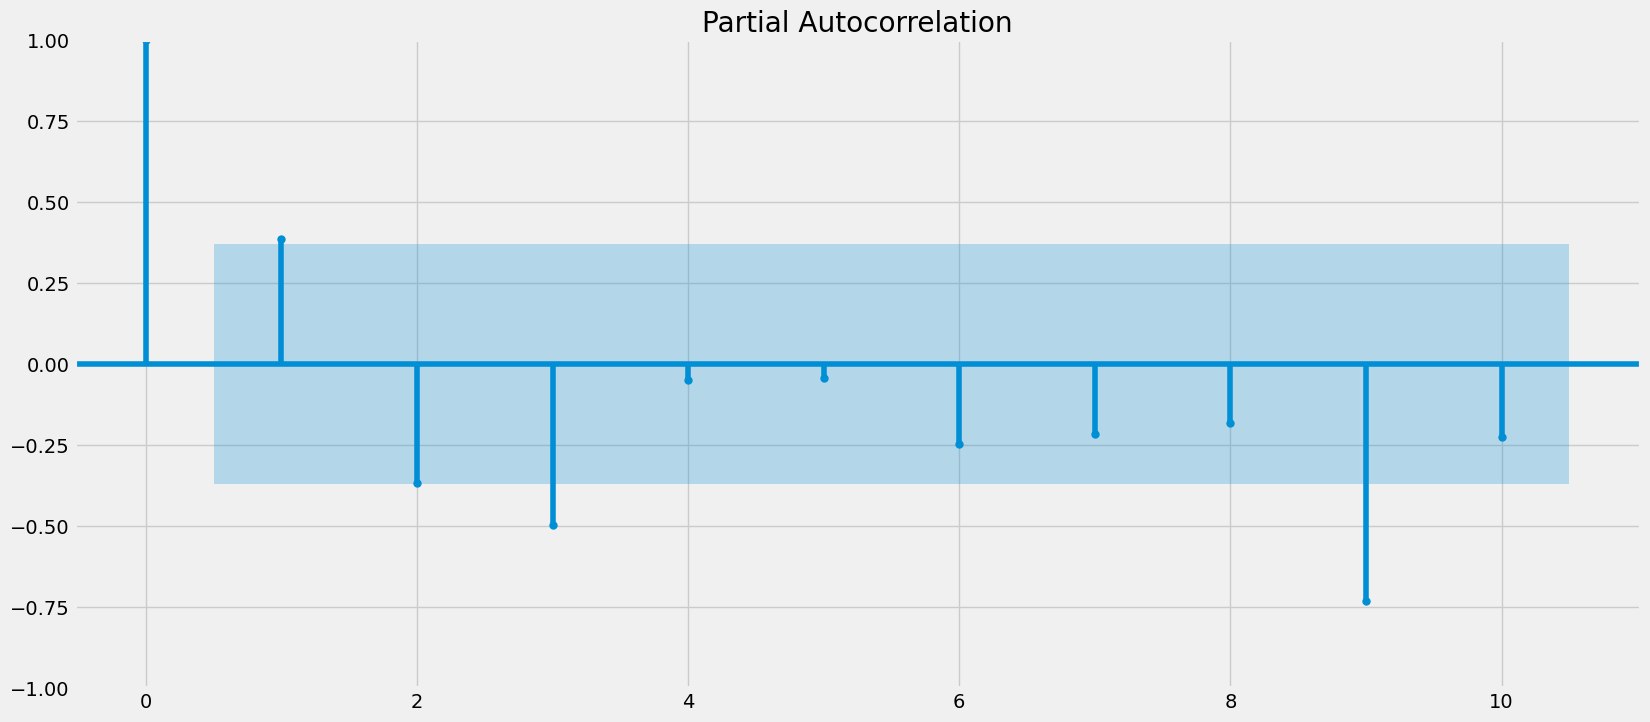

In [ ]:
plot_acf(df_sum_adj, lags=10)
matplotlib.pyplot.show()
plot_pacf(df_sum_adj, lags = 10)
matplotlib.pyplot.show()

In [ ]:
p = range(0, 3)
d = range(1,2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_sum_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 5.086729
         Iterations: 2
         Function evaluations: 45
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:286.8568452686678
Optimization terminated successfully.
         Current function value: 5.084215
         Iterations: 2
         Function evaluations: 42
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:288.7160133847932
Optimization terminated successfully.
         Current function value: 5.074417
         Iterations: 4
         Function evaluations: 135
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:290.1673418265614
Optimization terminated successfully.
         Current function value: 5.074351
         Iterations: 3
         Function evaluations: 139
ARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:292.16363523125887
Optimization terminated successfully.
         Current function value: 5.083964
         Iterations: 2
         Function evaluations: 52
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:288.70197731097795
Optimization terminated successfully

In [ ]:
#(0, 1, 2)x(0, 1, 0, 12)12
#(0, 1, 0)x(0, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(df_sum_adj,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 5.086729
         Iterations: 2
         Function evaluations: 45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.035e+07   4.63e+06      2.234      0.025    1.27e+06    1.94e+07


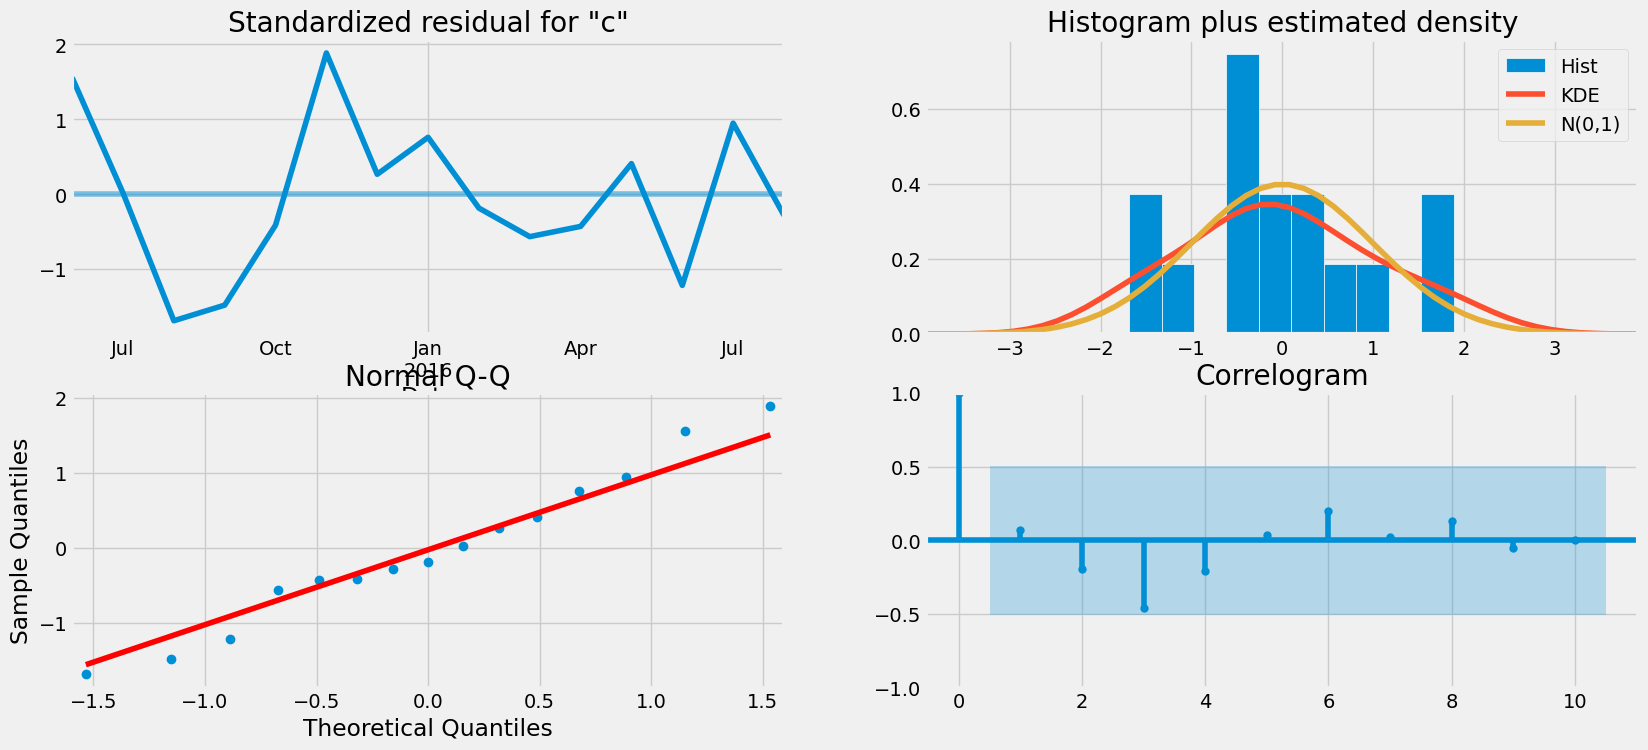

In [ ]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

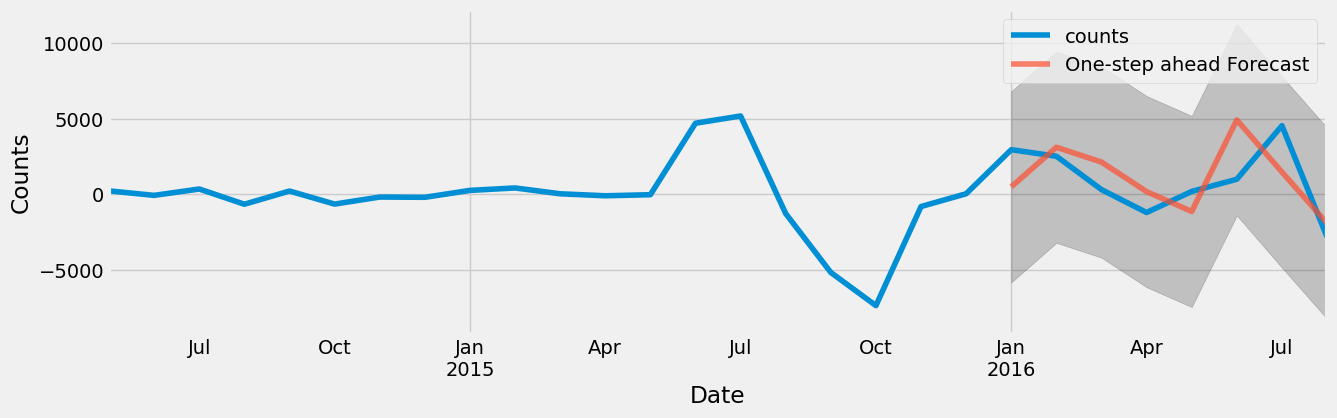

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_sum_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
plt.legend()
plt.show()